In [193]:
from google.colab import files

data = files.upload()

Saving train.csv to train (7).csv


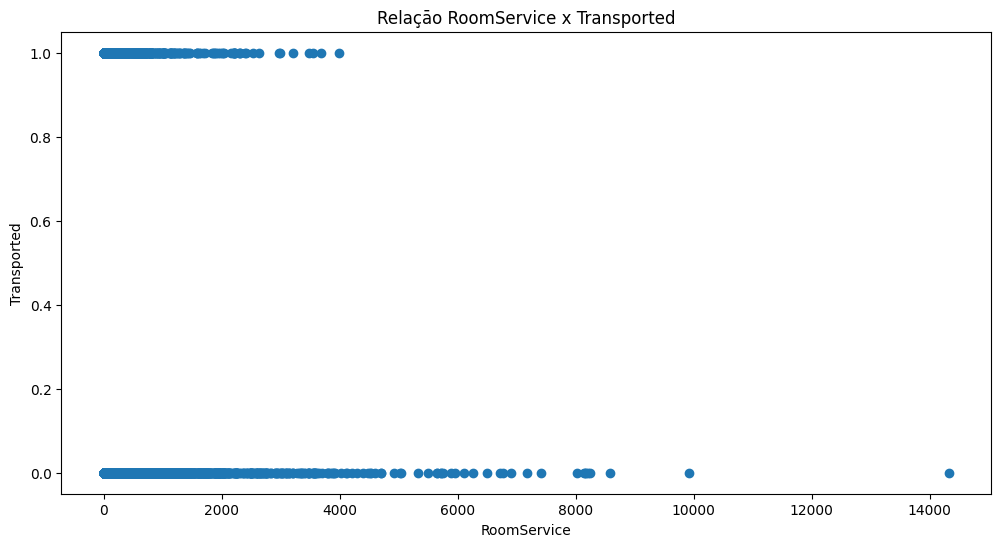

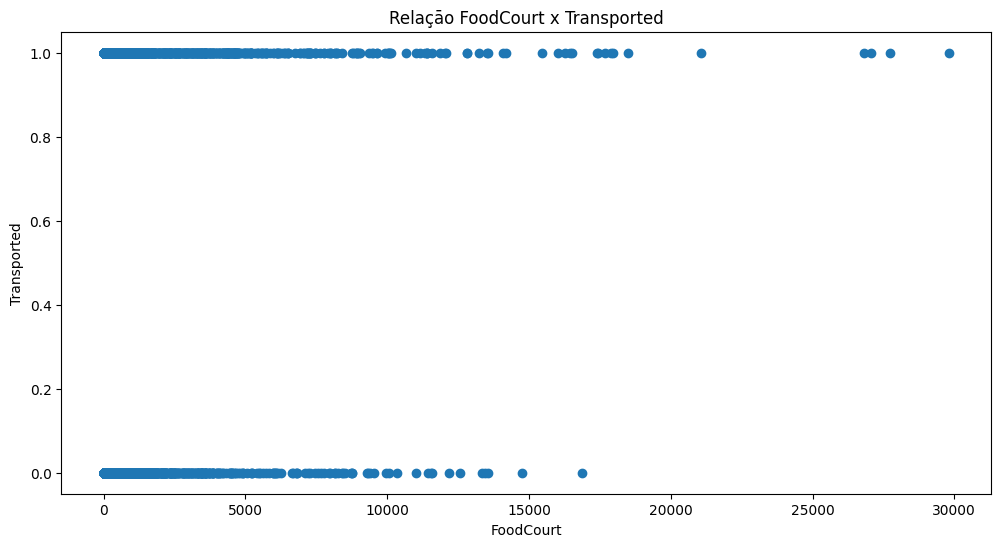

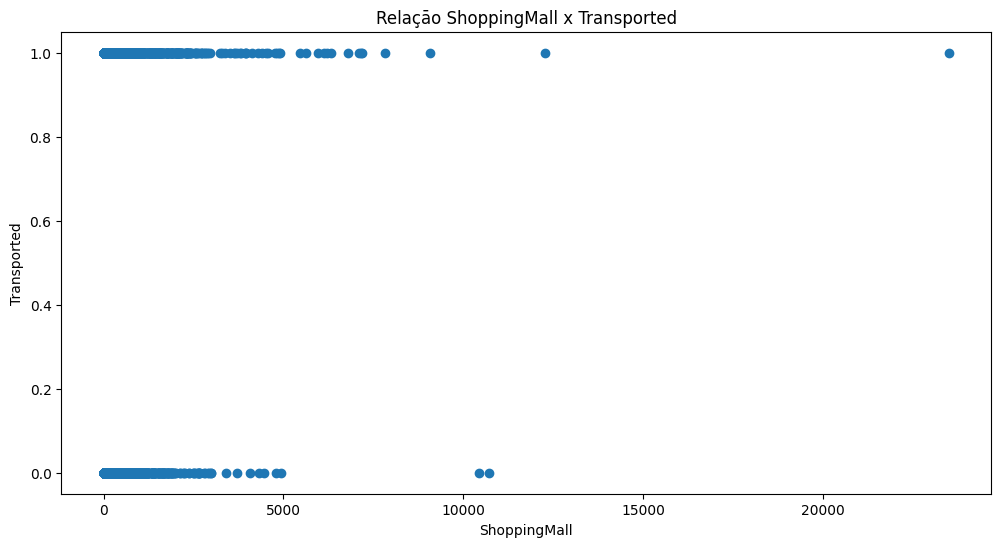

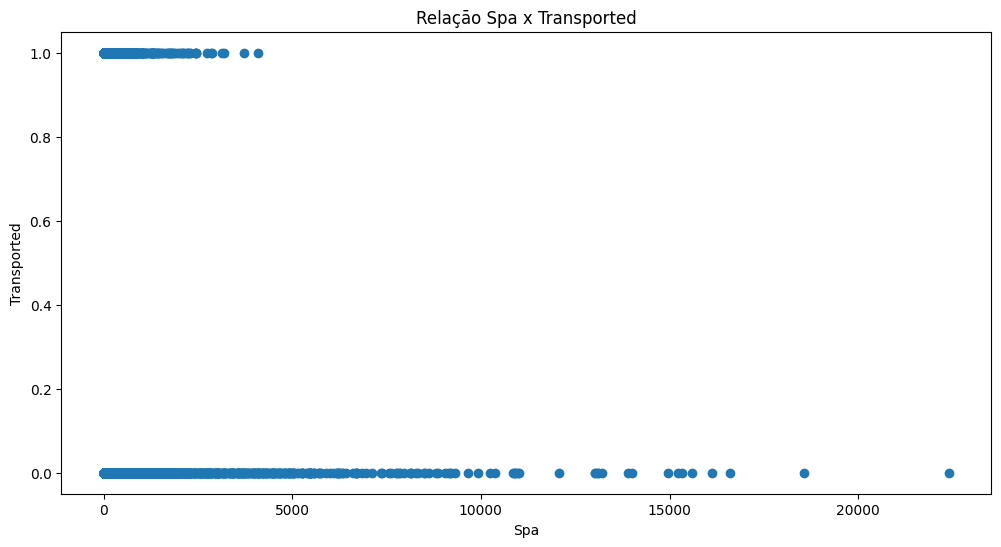

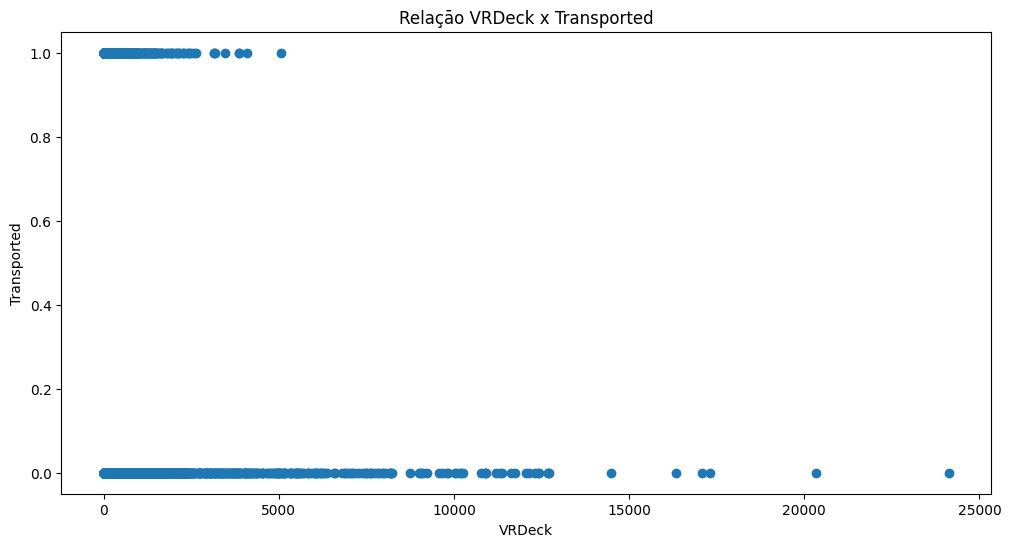

In [201]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

df_treino = pd.read_csv("train.csv")
features_para_tratar = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
for feature in features_para_tratar:
        plt.figure(figsize=(12,6))
        plt.scatter(df_treino[feature],df_treino["Transported"])
        plt.xlabel(feature)
        plt.ylabel("Transported")
        plt.title(f"Relaçāo {feature} x Transported")
        plt.show()

def tratar_dfs(df: pd.DataFrame) -> pd.DataFrame:
    for feature in features_para_tratar:
        df[feature] = df[feature].fillna(0)

    df["CryoSleep"] = df["CryoSleep"].fillna(0)
    df["CryoSleep"] = df["CryoSleep"].astype(int)
    df["VIP"] = df["VIP"].fillna(0)
    df["VIP"] = df["VIP"].astype(int)

    df["Age"] =  df["Age"].fillna(int(df["Age"].mean()))
    df["HomePlanet"] =  df["HomePlanet"].fillna("Desconhecido")
    df["Destination"] = df["Destination"].fillna("Desconhecido")
    df["Cabin"] = df["Cabin"].fillna("Desconhecido")

    return df

encoder = OneHotEncoder(handle_unknown="ignore",sparse_output=False)
encoder.set_output(transform="pandas")

encoder_output = encoder.fit_transform(df_treino[["HomePlanet","Destination","Cabin"]])
df = pd.concat([df_treino,encoder_output],axis=1)

features = ["CryoSleep","Age","VIP","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
features.extend(list(encoder_output.columns))



Descriçāo do DataSet

In [195]:
from sklearn import tree

df_treino = tratar_dfs(df_treino)
target = "Transported"

model = tree.ExtraTreeClassifier()

X_treino = df[features]
y_treino = df[target]

model.fit(X_treino,y_treino)

ExtraTreeClassifier()

In [196]:
teste = files.upload()

Saving test.csv to test (4).csv


In [197]:
df_teste = pd.read_csv("test.csv")

df_teste = tratar_dfs(df_teste)
df_teste = pd.concat([df_teste,encoder_output.iloc[:df_teste.shape[0]]], axis=1)

X_teste = df_teste[features]

resultados = {
    "PassengerId": df_teste["PassengerId"],
    "Transported": model.predict(X_teste)
}

df_resultado = pd.DataFrame(resultados)
df_resultado.to_csv("resultado_espacial.csv",index=False)
files.download("resultado_espacial.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>